# Individual Project Noémie Gautier - Draft

Webscrapping: SeLoger.com

Cities:Lesquin (59810), Faches-Thumesnil (59155), Ronchin (59790), Wattignies (59139).


## I. COLLECT THE DATA 

WITH SELENIUM

In [1]:
#STEP 1: Install Selenium
!pip install selenium

In [2]:
#STEP 2: Install chrome driver
PATH = "C:/Users/ngautier/Documents/Chrome Driver/chromedriver.exe"

In [3]:
#STEP 3: Imports
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.keys import Keys
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#STEP 4: Acess Webpages Seloger.com (reference: help from Professor)

pages = ["https://www.seloger.com/list.htm?tri=initial&enterprise=0&idtypebien=2,1&idtt=2,5&naturebien=1,2,4&ci=590343&m=search_hp_new",
        "https://www.seloger.com/list.htm?projects=2,5&types=1,2&natures=1,2,4&places=[{ci:590220}]&enterprise=0&qsVersion=1.0&m=search_refine",
        "https://www.seloger.com/list.htm?projects=2%2C5&types=1%2C2&natures=1%2C2%2C4&places=%5B%7Bci%3A590220%7D%5D&enterprise=0&qsVersion=1.0&LISTING-LISTpg=2",
        "https://www.seloger.com/list.htm?projects=2%2C5&types=1%2C2&natures=1%2C2%2C4&places=%5B%7Bci%3A590220%7D%5D&enterprise=0&qsVersion=1.0&LISTING-LISTpg=3",
        "https://www.seloger.com/list.htm?projects=2%2C5&types=1%2C2&natures=1%2C2%2C4&places=%5B%7Bci%3A590220%7D%5D&enterprise=0&qsVersion=1.0&LISTING-LISTpg=4",
        "https://www.seloger.com/list.htm?projects=2%2C5&types=1%2C2&natures=1%2C2%2C4&places=%5B%7Bci%3A590220%7D%5D&enterprise=0&qsVersion=1.0&LISTING-LISTpg=5",
        "https://www.seloger.com/list.htm?projects=2,5&types=1,2&natures=1,2,4&places=[{ci:590507}]&enterprise=0&qsVersion=1.0&m=search_refine",
        "https://www.seloger.com/list.htm?projects=2%2C5&types=1%2C2&natures=1%2C2%2C4&places=%5B%7Bci%3A590507%7D%5D&enterprise=0&qsVersion=1.0&LISTING-LISTpg=2",
        "https://www.seloger.com/list.htm?projects=2%2C5&types=1%2C2&natures=1%2C2%2C4&places=%5B%7Bci%3A590507%7D%5D&enterprise=0&qsVersion=1.0&LISTING-LISTpg=3",
        "https://www.seloger.com/list.htm?projects=2%2C5&types=1%2C2&natures=1%2C2%2C4&places=%5B%7Bci%3A590507%7D%5D&enterprise=0&qsVersion=1.0&LISTING-LISTpg=4",
        "https://www.seloger.com/list.htm?projects=2,5&types=1,2&natures=1,2,4&places=[{ci:590648}]&enterprise=0&qsVersion=1.0&m=search_refine",
        "https://www.seloger.com/list.htm?projects=2%2C5&types=1%2C2&natures=1%2C2%2C4&places=%5B%7Bci%3A590648%7D%5D&enterprise=0&qsVersion=1.0&LISTING-LISTpg=2",
        "https://www.seloger.com/list.htm?projects=2%2C5&types=1%2C2&natures=1%2C2%2C4&places=%5B%7Bci%3A590648%7D%5D&enterprise=0&qsVersion=1.0&LISTING-LISTpg=3"
        ]


# Create an empty list:
housing_offers = []


# User computer path 
path = "C:/Users/ngautier/Documents/Chrome Driver/chromedriver.exe"
driver = webdriver.Chrome(path)
driver.implicitly_wait(40) #so that google sees less you're a robot


# Launch the pages
for i in range(0, len (pages)):
    driver.get(pages[i])


    #Launch the page
    driver.get(pages[i])
    driver.implicitly_wait(60)
    
    #Find the block content:
    block = driver.find_elements_by_xpath("//*[contains(@class, 'block__ShadowedBlock')]")
    
    
    #Loop through the block of content: 
    for content in block:

         # Handle error, there are some blocks for advertising, not housing info
        try: 

            # Extract information
            # Title
            title = content.find_element_by_xpath(".//*[contains(@class, 'ContentZone__Title')]").text
            # House description
            description = content.find_element_by_xpath(".//*[contains(@class, 'ContentZone__Tags')]").text
            # Price    
            price = content.find_element_by_xpath(".//*[contains(@class, 'Price__Label')]").text

            # Print out
            housing_offers.append([i,title, description, price])

        except:
            pass
        
print(housing_offers)

[[0, 'Maison/Villa', '6 p4 ch120 m²', '379 000 €'], [0, 'Maison/Villa', '5 p3 ch208 m²', '479 000 €'], [0, 'Maison/Villa', '4 p3 ch130 m²', '299 000 €'], [0, 'Projet de construction', '3 p2 ch75 m²', '160 420 €'], [0, 'Projet de construction', '3 p2 ch67 m²', '166 500 €'], [0, 'Projet de construction', '6 p4 ch137 m²', '255 100 €'], [0, 'Appartement', '3 p2 ch60 m²', '185 500 €'], [0, 'Appartement', '4 p3 ch68 m²', '158 500 €'], [0, 'Projet de construction', '3 p2 ch65 m²', '156 900 €'], [0, 'Projet de construction', '6 p4 ch122 m²', '241 300 €'], [0, 'Maison/Villa', '5 p3 ch220 m²', '483 000 €'], [0, 'Projet de construction', '3 p2 ch74 m²', '171 400 €'], [0, 'Maison/Villa', '5 p4 ch123 m²', '379 000 €'], [0, 'Appartement neuf', '3 p65,11 m²1 terr', '222 000 €'], [0, 'Appartement', '3 p2 ch62 m²', '210 000 €'], [0, 'Maison/Villa', '5 p3 ch85 m²', '240 000 €'], [0, 'Maison/Villa', '6 p4 ch116 m²', '379 000 €'], [0, 'Appartement', '3 p2 ch1 park', '215 000 €'], [1, 'Appartement', '3 p2 

In [5]:
# STEP 5: Create a dataframe
df_houses_appartements = pd.DataFrame(housing_offers)
df_houses_appartements.to_csv('houses_appartements.csv', index = False, header = True)
houses_app = pd.read_csv('houses_appartements.csv')

In [ ]:
# Pages[0] = Lesquin (59810)
# Page[1:5] = Thumesnil (59155)
# Page[6:9] = Ronchin (59790)
# Page[10:12] = Wattignies (59139)

In [9]:
# Testing extraction of title 
driver.get(pages[2])
print(driver.title)

seloger.com


In [7]:
houses_app.head()

,0,1,2,3
0,0,Maison/Villa,6 p4 ch120 m²,379 000 €
1,0,Maison/Villa,5 p3 ch208 m²,479 000 €
2,0,Maison/Villa,4 p3 ch130 m²,299 000 €
3,0,Projet de construction,3 p2 ch75 m²,160 420 €
4,0,Projet de construction,3 p2 ch67 m²,166 500 €


In [8]:
houses_app.describe()

,0
count,264.000000
mean,5.496212
std,3.552965
min,0.000000
25%,2.000000
50%,5.500000
75%,8.000000
max,12.000000


## II. PROCESS THE DATA 

STEP 1: Clean the data:

In [10]:
# Create column names
# adding column name to the respective columns 
houses_app.columns =['Page', 'Type', 'Description', 'Price'] 
  
# displaying the DataFrame 
print(houses_app)

     Page                    Type    Description      Price
0       0            Maison/Villa  6 p4 ch120 m²  379 000 €
1       0            Maison/Villa  5 p3 ch208 m²  479 000 €
2       0            Maison/Villa  4 p3 ch130 m²  299 000 €
3       0  Projet de construction   3 p2 ch75 m²  160 420 €
4       0  Projet de construction   3 p2 ch67 m²  166 500 €
..    ...                     ...            ...        ...
259    12            Maison/Villa   6 p3 ch96 m²  220 000 €
260    12            Maison/Villa  5 p3 ch120 m²  215 000 €
261    12            Maison/Villa  5 p4 ch106 m²  314 000 €
262    12            Maison/Villa  5 p4 ch130 m²  380 000 €
263    12            Maison/Villa   4 p3 ch87 m²  198 900 €

[264 rows x 4 columns]


In [11]:
# Add column with city:

#Create a function of cities
def cities(row):
    if row ['Page'] < 1:
        val = 'Lesquin'
    elif row['Page'] < 6 :
        val = 'Faches-Thumesnil '
    elif row['Page'] > 9:
        val = 'Wattignies'
    else:
        val = 'Ronchin'
    return val

#Add it to dataframe:
houses_app.insert(1, 'City', houses_app.apply(cities, axis=1))
print(houses_app)

     Page        City                    Type    Description      Price
0       0     Lesquin            Maison/Villa  6 p4 ch120 m²  379 000 €
1       0     Lesquin            Maison/Villa  5 p3 ch208 m²  479 000 €
2       0     Lesquin            Maison/Villa  4 p3 ch130 m²  299 000 €
3       0     Lesquin  Projet de construction   3 p2 ch75 m²  160 420 €
4       0     Lesquin  Projet de construction   3 p2 ch67 m²  166 500 €
..    ...         ...                     ...            ...        ...
259    12  Wattignies            Maison/Villa   6 p3 ch96 m²  220 000 €
260    12  Wattignies            Maison/Villa  5 p3 ch120 m²  215 000 €
261    12  Wattignies            Maison/Villa  5 p4 ch106 m²  314 000 €
262    12  Wattignies            Maison/Villa  5 p4 ch130 m²  380 000 €
263    12  Wattignies            Maison/Villa   4 p3 ch87 m²  198 900 €

[264 rows x 5 columns]


In [12]:
# Add column with District code

#Create a function of cities
def Postal_code(row):
    if row ['Page'] < 1:
        val = '59810'
    elif row['Page'] < 6:
        val = '59155'
    elif row['Page'] > 9:
        val = '59139'
    else:
        val = '59790'
    return val


#Add it to dataframe:
houses_app.insert(2, 'Postal Code', houses_app.apply(Postal_code, axis=1))
print(houses_app)

     Page        City Postal Code                    Type    Description  \
0       0     Lesquin       59810            Maison/Villa  6 p4 ch120 m²   
1       0     Lesquin       59810            Maison/Villa  5 p3 ch208 m²   
2       0     Lesquin       59810            Maison/Villa  4 p3 ch130 m²   
3       0     Lesquin       59810  Projet de construction   3 p2 ch75 m²   
4       0     Lesquin       59810  Projet de construction   3 p2 ch67 m²   
..    ...         ...         ...                     ...            ...   
259    12  Wattignies       59139            Maison/Villa   6 p3 ch96 m²   
260    12  Wattignies       59139            Maison/Villa  5 p3 ch120 m²   
261    12  Wattignies       59139            Maison/Villa  5 p4 ch106 m²   
262    12  Wattignies       59139            Maison/Villa  5 p4 ch130 m²   
263    12  Wattignies       59139            Maison/Villa   4 p3 ch87 m²   

         Price  
0    379 000 €  
1    479 000 €  
2    299 000 €  
3    160 420 €  
4 

In [13]:
houses_app.head()

,Page,City,Postal Code,Type,Description,Price
0,0,Lesquin,59810,Maison/Villa,6 p4 ch120 m²,379 000 €
1,0,Lesquin,59810,Maison/Villa,5 p3 ch208 m²,479 000 €
2,0,Lesquin,59810,Maison/Villa,4 p3 ch130 m²,299 000 €
3,0,Lesquin,59810,Projet de construction,3 p2 ch75 m²,160 420 €
4,0,Lesquin,59810,Projet de construction,3 p2 ch67 m²,166 500 €


In [14]:
# Put price column in the right format - integer
#Take out € sign
houses_app["Price"] = houses_app.Price.str.replace('€', '')
houses_app["Price"] = houses_app.Price.str.replace(' ', '')

#convert to numeric
houses_app['Price']  = pd.to_numeric(houses_app.Price, errors='coerce')

In [15]:
houses_app.head()

,Page,City,Postal Code,Type,Description,Price
0,0,Lesquin,59810,Maison/Villa,6 p4 ch120 m²,379000.0
1,0,Lesquin,59810,Maison/Villa,5 p3 ch208 m²,479000.0
2,0,Lesquin,59810,Maison/Villa,4 p3 ch130 m²,299000.0
3,0,Lesquin,59810,Projet de construction,3 p2 ch75 m²,160420.0
4,0,Lesquin,59810,Projet de construction,3 p2 ch67 m²,166500.0


In [16]:
# Split column Description into three columns: rooms, bedrooms, square meters

#Take out signs
houses_app["Description"] = houses_app.Description.str.replace('p', '.')
houses_app["Description"] = houses_app.Description.str.replace('ch', '.')
houses_app["Description"] = houses_app.Description.str.replace('m²', ' ')
houses_app.head()

,Page,City,Postal Code,Type,Description,Price
0,0,Lesquin,59810,Maison/Villa,6 .4 .120,379000.0
1,0,Lesquin,59810,Maison/Villa,5 .3 .208,479000.0
2,0,Lesquin,59810,Maison/Villa,4 .3 .130,299000.0
3,0,Lesquin,59810,Projet de construction,3 .2 .75,160420.0
4,0,Lesquin,59810,Projet de construction,3 .2 .67,166500.0


In [17]:
#Split into three columns
houses_app[["Rooms", "Bedrooms", "Size"]] = houses_app["Description"].str.split('.', n=2, expand = True)

In [18]:
# Need to change Rooms, Bedrooms and Size to Numeric
houses_app['Rooms']  = pd.to_numeric(houses_app.Rooms, errors='coerce')
houses_app['Bedrooms']  = pd.to_numeric(houses_app.Bedrooms, errors='coerce')
houses_app['Size']  = pd.to_numeric(houses_app.Size, errors='coerce')

In [19]:
# Now we don't need the Description column
del houses_app["Description"]

In [20]:
# Final Cleaned table 
houses_app.head()

,Page,City,Postal Code,Type,Price,Rooms,Bedrooms,Size
0,0,Lesquin,59810,Maison/Villa,379000.0,6,4.0,120.0
1,0,Lesquin,59810,Maison/Villa,479000.0,5,3.0,208.0
2,0,Lesquin,59810,Maison/Villa,299000.0,4,3.0,130.0
3,0,Lesquin,59810,Projet de construction,160420.0,3,2.0,75.0
4,0,Lesquin,59810,Projet de construction,166500.0,3,2.0,67.0


STEP 2: Calculate the average house price per squared meter for each city 

In [21]:
# Checking the data types:
print(houses_app.dtypes)

Page             int64
City            object
Postal Code     object
Type            object
Price          float64
Rooms            int64
Bedrooms       float64
Size           float64
dtype: object


Calculating average price per m²

In [22]:
# Calculate Price per meter for each housing offer:

# Calculate price per squared meter:
houses_app["Price"] / houses_app["Size"] 

#Add it to Data Frame:
houses_app['Price per m²']=houses_app["Price"] / houses_app["Size"] 

#Check Table:
houses_app.head()

,Page,City,Postal Code,Type,Price,Rooms,Bedrooms,Size,Price per m²
0,0,Lesquin,59810,Maison/Villa,379000.0,6,4.0,120.0,3158.333333
1,0,Lesquin,59810,Maison/Villa,479000.0,5,3.0,208.0,2302.884615
2,0,Lesquin,59810,Maison/Villa,299000.0,4,3.0,130.0,2300.000000
3,0,Lesquin,59810,Projet de construction,160420.0,3,2.0,75.0,2138.933333
4,0,Lesquin,59810,Projet de construction,166500.0,3,2.0,67.0,2485.074627


In [23]:
# Take out NaN values:
houses_app = houses_app.dropna()

In [24]:
# Put all this in a csv file
df_housing_cleaned = pd.DataFrame(houses_app)
df_housing_cleaned.to_csv('housing_cleaned.csv', index = False, header = True)
housing_cleaned = pd.read_csv('housing_cleaned.csv')

In [25]:
houses_app.head()

,Page,City,Postal Code,Type,Price,Rooms,Bedrooms,Size,Price per m²
0,0,Lesquin,59810,Maison/Villa,379000.0,6,4.0,120.0,3158.333333
1,0,Lesquin,59810,Maison/Villa,479000.0,5,3.0,208.0,2302.884615
2,0,Lesquin,59810,Maison/Villa,299000.0,4,3.0,130.0,2300.000000
3,0,Lesquin,59810,Projet de construction,160420.0,3,2.0,75.0,2138.933333
4,0,Lesquin,59810,Projet de construction,166500.0,3,2.0,67.0,2485.074627


In [26]:
# Calcualte average price per meter:
houses_app['Price per m²'].mean()

2400.0715204359194

In [28]:
# Calculate avergae price per meter for each city:
average_price_per_meter = houses_app.groupby('City')['Price per m²'].agg('mean').sort_values(ascending=False)
print(average_price_per_meter)

City
Lesquin              2570.773304
Faches-Thumesnil     2513.915913
Ronchin              2277.662712
Wattignies           2232.313324
Name: Price per m², dtype: float64


In [29]:
#Create Dataframe of Average Price per m² per city
df_average_price_meters = pd.DataFrame(average_price_per_meter )
df_average_price_meters.to_csv('average_price_meters.csv', index = False, header = True)
avg_price_meters = pd.read_csv('average_price_meters.csv')

In [30]:
avg_price_meters.head()

,Price per m²
0,2570.773304
1,2513.915913
2,2277.662712
3,2232.313324


In [31]:
#Add collumn with city names:
avg_price_meters.insert(0, "City", ['Lesquin', 'Faches-Thumesnil ', 'Ronchin', 'Wattignies '], True)

avg_price_meters.head()

,City,Price per m²
0,Lesquin,2570.773304
1,Faches-Thumesnil,2513.915913
2,Ronchin,2277.662712
3,Wattignies,2232.313324


Calculating average price

In [32]:
# Calcualte average price:
houses_app['Price'].mean()

237782.78125

In [39]:
# Calculate avergae price for each city:
average_price = houses_app.groupby('City')['Price'].agg('mean').sort_values(ascending=False)
print(average_price)

City
Lesquin              271476.250000
Faches-Thumesnil     243426.231884
Ronchin              235991.477273
Wattignies           210373.870968
Name: Price, dtype: float64


In [40]:
#Create Dataframe of Average Price= per city
df_average_price = pd.DataFrame(average_price)
df_average_price.to_csv('average_price.csv', index = False, header = True)
avg_price = pd.read_csv('average_price.csv')

In [41]:
#Add collumn with city names:
avg_price.insert(0, "City", ['Lesquin', 'Faches-Thumesnil ', 'Ronchin', 'Wattignies '], True)

avg_price.head()

,City,Price
0,Lesquin,271476.250000
1,Faches-Thumesnil,243426.231884
2,Ronchin,235991.477273
3,Wattignies,210373.870968


 EXTRA - Find the demographics information of the cities (e.g. population, income, unemployment, etc.) 

In [118]:
# Import CSV file with demographic data:

Demographic_info = pd.read_csv (r'C:\Users\ngautier\OneDrive - IESEG\Financial Programming\Individual Project\Demographic.csv')
print (Demographic_info)

                City  Population   Average Income (year)  Unemployement Rate
0            Lesquin         9398                  34652                 8.9
1  Faches-Thumesnil         17835                  29400                14.9
2            Ronchin        19920                  28952                 8.0
3        Wattignies         15304                  29860                 8.9


In [70]:
Demographic_info.head()

,City,Population,Average Income (year),Unemployement Rate
0,Lesquin,9398,34652,8.9
1,Faches-Thumesnil,17835,29400,14.9
2,Ronchin,19920,28952,8.0
3,Wattignies,15304,29860,8.9


In [184]:
#Add collumn with average housing price:
Demographic_info.insert(4, "Avg Housing Price", ['271476', '243426 ', '235991', '210373 '], True)
Demographic_info.insert(5, "Avg Housing Price per m²", ['2570.77', '2513.91 ', '2277.66', '2232.31 '], True)

Demographic_info.head()

,City,Population,Average Income (year),Unemployement Rate,Avg Housing Price,Avg Housing Price per m²,Avg_Housing_Price,Avg Housing Price per m²,Avg Housing Price,Avg Housing Price per m²
0,Lesquin,9398,34652,8.9,271476,2570.77,271476,2570.77,271476,2570.77
1,Faches-Thumesnil,17835,29400,14.9,243426,2513.91,243426,2513.91,243426,2513.91
2,Ronchin,19920,28952,8.0,235991,2277.66,235991,2277.66,235991,2277.66
3,Wattignies,15304,29860,8.9,210373,2232.31,210373,2232.31,210373,2232.31


## III. PRESENT THE DATA 

Create visuals of data: 

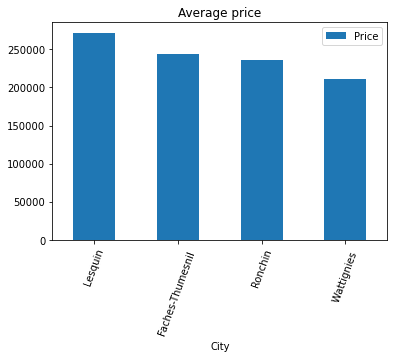

In [43]:
# Bar graph to compare the average price for each city 
avg_price.plot.bar(x="City", y="Price", rot=70, title="Average price");

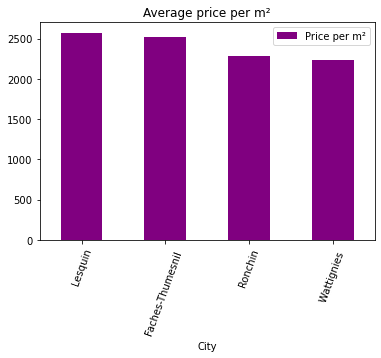

In [123]:
# Bar graph to compare the avergae price per m² for each city 
avg_price_meters.plot.bar(x="City", y="Price per m²", rot=70, title="Average price per m²", color = 'purple');

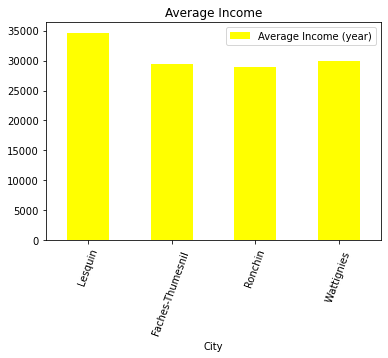

In [82]:
# Graph of  Income
Demographic_info.plot.bar(x="City", y="Average Income (year)", rot=70, title="Average Income", color = 'yellow');

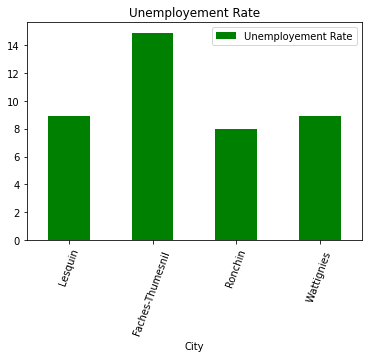

In [122]:
# Graph of Unemployement rate
Demographic_info.plot.bar(x="City", y="Unemployement Rate", rot=70, title="Unemployement Rate", color = 'Green');

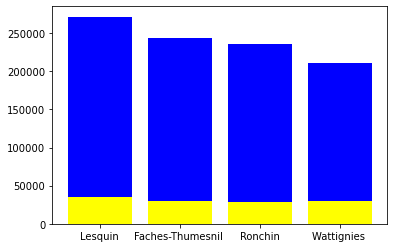

In [127]:
# Combine price and income
plt.bar(avg_price['City'], avg_price['Price'], color = 'blue')
plt.bar(Demographic_info['City'], Demographic_info['Average Income (year)'], color = 'yellow')

plt.show() 

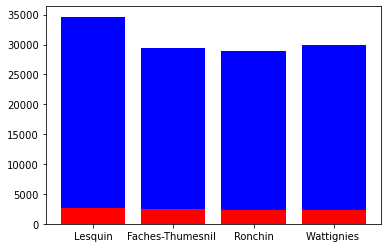

In [120]:
# Combine price per m² and income
plt.bar(Demographic_info['City'], Demographic_info['Average Income (year)'], color = 'blue')
plt.bar(avg_price_meters['City'], avg_price_meters['Price per m²'], color = 'red')

plt.show() 

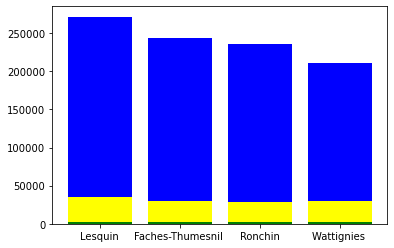

In [126]:
#Combine all three in a bar graph:
plt.bar(avg_price['City'], avg_price['Price'], color = 'blue')
plt.bar(Demographic_info['City'], Demographic_info['Average Income (year)'], color = 'yellow')
plt.bar(avg_price_meters['City'], avg_price_meters['Price per m²'], color = 'Green')

plt.show() 

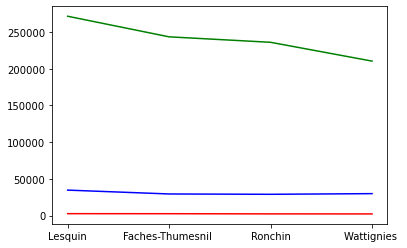

In [46]:
# Combine all three in one line graph
plt.plot(avg_price_meters['City'], avg_price_meters['Price per m²'], color = 'red')
plt.plot(avg_price['City'], avg_price['Price'], color = 'green')
plt.plot(Demographic_info['City'], Demographic_info['Average Income (year)'], color = 'blue')

plt.show() 

Making a visual map:

In [ ]:
#Install:
!pip install folium

In [ ]:
# Import libraries
import folium

In [ ]:
# CREATING AN INTERACTIVE MAP:

# Create map object
m= folium.Map(location = [50.3758, 3.0330], zoom_start = 9)

#Create markers for each city
folium.Marker([50.5909, 3.1112],
              popup = '<strong> Lesquin </strong>',
              tooltip = 'Average Housing Price: 271 476 €',
              icon = folium.Icon(color = 'lightblue')).add_to(m),
folium.Marker([50.3459, 3.4001],
              popup = '<strong> Faches-Thumesnil </strong>',
              tooltip = 'Average Housing Price: 243 426 €',
              icon = folium.Icon(color = 'green')).add_to(m),
folium.Marker([50.6059, 3.0787],
              popup = '<strong> Ronchin </strong>',
              tooltip = 'Average Housing Price: 235 991 €',
              icon = folium.Icon(color = 'red')).add_to(m),
folium.Marker([50.5814, 3.0440],
              popup = '<strong> Wattignies </strong>',
              tooltip = 'Average Housing Price: 210 373 €',
              icon = folium.Icon(color = 'orange')).add_to(m),


#Generate map
m.save('map.html')

In [ ]:
#Video that helped me code the map: https://www.youtube.com/watch?v=4RnU5qKTfYY 